ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **12Sep20**

# Laboratory Work 03 (17Sep20)

### Name: `Julie St.Cyr`

### Rubric for each assignment: 

|        Context           |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file: 
   </span> labwork-xx.ipynb<span style="color:red"> on Blackboard.</span>

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (20 pts)](#a1)
 - [Import image as an array](#a11)
 - [Explain your data structure](#a12)
 - [Show data as image](#a13)
 - [Shape of array](#a14)
 - [Statistics of array](#a15)
 - [Data coarsening](#a16)
 - [Explain feature in data](#a17)
* [Assignment 2 (25 pts)](#a2)
 - [Data slicing](#a21)
 - [Coarsened slicing](#a22)
* [Assignment 3 (25 pts)](#a3)
 - [Import temperature field image](#a31)
 - [Crop field](#a32)
 - [Calculate centerline temperature](#a33)
 - [Find region with temperature above mean](#a34)
* [Assignment 4 (25 pts)](#a4)
 - [Array superposition](#a41)
 - [Array juxtaposition](#a42)
* [Assignment 5 (5 pts)](#a5)
---

## <span style="color:blue">[Assignment 1 (20 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa) Import this [image (dissolving particle)](https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/dissolve.png) as an array.</span><a id="a11"></a>

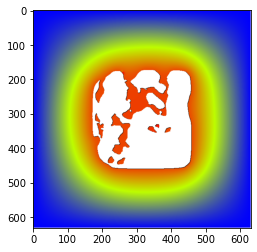

block type=  <class 'numpy.ndarray'>
block shape=  (632, 632, 3)
block type=  float32


In [1]:
'''Code'''
import numpy as np   #import numpy package and give shortcut of np


from matplotlib import image                 
from matplotlib import pyplot as plt     #import pyplot as plt

block = plt.imread( 'images/dissolve.png', format='png' )    #import dissolving particle 

plt.imshow(block)
plt.show()

print("block type= ", type(block))
print("block shape= ", block.shape)
print("block type= ", block.dtype)



### <span style="color:blue">[1.2)](#toa) What is the data type? Explain what does it mean.</span><a id="a12"></a>

In [2]:
'''Code'''
print(type(block))   #show type of data 

<class 'numpy.ndarray'>


<span style="color:blue">**Explain:**</span>

The image and data structure above are a numpy array. This is because it is a three-dimensional structure. It has a x and y axis and the "z" axis is the laters of color that are needed to produce the colors shown. 

### <span style="color:blue">[1.3)](#toa) Show the array as an image with title: "Dissolution", and axes labels: "x pixel" and "y pixel". </span><a id="a13"></a>

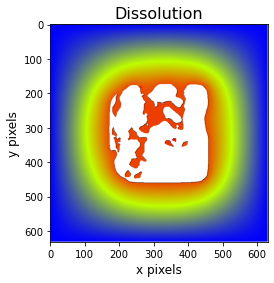

In [3]:
'''Code'''
plt.imshow(block)                                
plt.title('Dissolution',fontsize=16)
plt.xlabel('x pixels',fontsize=12)
plt.ylabel('y pixels',fontsize=12)

plt.show()

### <span style="color:blue">[1.4)](#toa) Print the shape of the array. Explain the result.</span><a id="a14"></a>

In [4]:
'''Code'''
print("shape= ", block.shape)

shape=  (632, 632, 3)


<span style="color:blue">**Explain:**</span>.

The shape of the array is the amount of pixels in each dimension. There are 632 on each the x and the y axises. The 3 stands for the array displaying all three colors red, green, and blue which are able to create the image. 

+ The shape can be found by printing the name of your image then ".shape". 

### <span style="color:blue">[1.5)](#toa) Print the maximum, mininum, mean, and variance values of the array.</span><a id="a15"></a>

In [5]:
'''Code'''
print('max. = ', np.max(block))
print('min. = ', np.min(block))
print('mean = ', np.mean(block))
print('var. = ', np.var(block))


max. =  1.0
min. =  0.0
mean =  0.52940744
var. =  0.12825227


### <span style="color:blue">[1.6)](#toa) Coarsen the data by a factor of 30 and visualize the result.</span><a id="a16"></a>

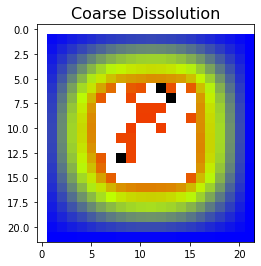

coarse shape = (22, 22, 3)


In [6]:
'''Code'''

coarse = block[::30,::30,:] #coarsen by 30 in the x and y axis 

plt.imshow(coarse)

plt.title('Coarse Dissolution',fontsize=16)
plt.show()
print('coarse shape =', coarse.shape)

### <span style="color:blue">[1.7)](#toa) Explain why the white border appeared.</span><a id="a17"></a>

<span style="color:blue">**Explain:**</span>

The white border in the coaser dissolution appeared because the white coloring was present in the original image but unable to be seen by the eye. This is because in the original image the amount of pixels is much higher, making each individual pixel significantly smaller. In the original image the white board is present but in the very small pixels. In the coarse image however the white can be seen as the amount of pixels is much less making each pixel exponentially larger revealing the white boarder and even the black in the center which are both unable to be seen due to how small the pixels are in the original image.

## <span style="color:blue">[Assignment 2 (25 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa) Produce a plot of the diagonal of the original array in Assignment 1 for each color and their average. Give the plot a meaningful title and a meaningful label for the axes; *i.e.* explain what the plot represents.</span><a id="a21"></a>

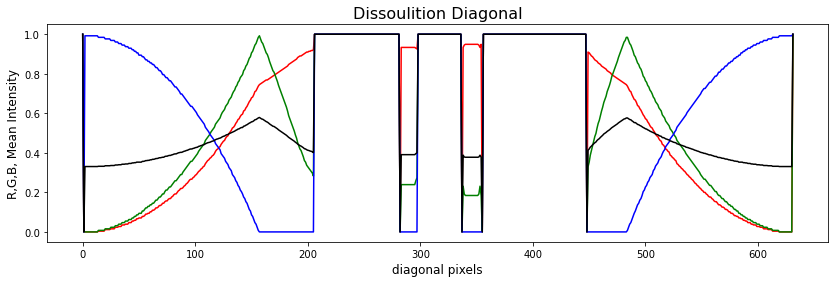

In [7]:
'''Code'''

import numpy as np      #import numpy 
from matplotlib import image
from matplotlib import pyplot as plt

block = plt.imread( 'images/dissolve.png', format='png' )


r_diag = np.diagonal (block[:,:,0])                 #diagonal reading of red 
g_diag= np.diagonal(block[:,:,1])                #diagonal reading of green 
b_diag= np.diagonal(block[:,:,2])                #diagonal reading of blue  
mean_diag=np.diagonal((block[:,:,0]+block[:,:,1]+block[:,:,2])/3)     #taking mean of the intensities 

n_pixels = r_diag.size
plt.rcParams['figure.figsize']= [14,4]

plt.figure(3)
plt.plot(range(n_pixels), r_diag,'r', g_diag, 'g', b_diag, 'b', mean_diag, 'k')



plt.title('Dissoulition Diagonal',fontsize=16)
plt.xlabel('diagonal pixels',fontsize=12)
plt.ylabel('R,G,B, Mean Intensity',fontsize=12)
plt.show()





Explain

This plot shows the amount of each layer in the "z" axis (red, blue or green). The lines move up and down depending how intense the color is (how much is present). This is tracked for a diagonal line acorss the original image. Places the intensity is 0, means that color is not used at all within that pixel. If the intensity of the color is at 1, it means that color is at its highest intensity in that pixel. These intensities can be adjusted to create numerous colors to create these images. For example where the flat lines are at the top indicated all the colors are at there highest intensities, representing white. 

The mean intensity is a plot of what the average intensity of all three colors is. The black line can be show moving thorughout the middle of the other three lines. It hits the same platueas as the other three as well since the mean would be 1 if all the values are 1. The mean is a calculation of (red intensity + blue intensity + green intensity)/3. 

### <span style="color:blue">[2.2)](#toa) Coarsen the plot in 2.1) by a factor of 10 as below.</span><a id="a22"></a>

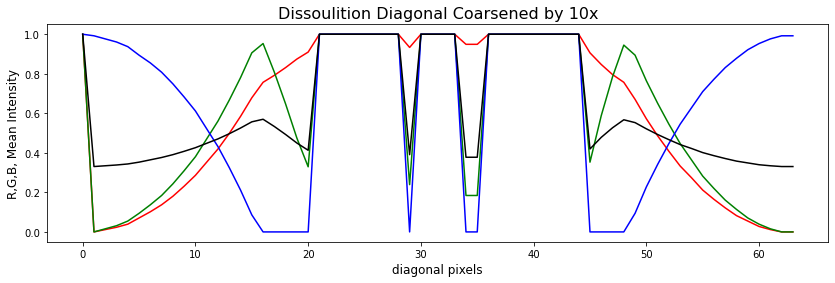

In [8]:
'''Code'''


r_diag = np.diagonal (block[::10,::10,0])          #coarsen the block by 10 and then reading the diagonal
g_diag= np.diagonal(block[::10,::10,1])
b_diag= np.diagonal(block[::10,::10,2])
mean_diag=np.diagonal((block[::10,::10,0]+block[::10,::10,1]+block[::10,::10,2])/3)

n_pixels = r_diag.size

plt.figure(4)
plt.plot(range(n_pixels), r_diag,'r', g_diag, 'g', b_diag, 'b', mean_diag, 'k')

plt.title('Dissoulition Diagonal Coarsened by 10x',fontsize=16)
plt.xlabel('diagonal pixels',fontsize=12)
plt.ylabel('R,G,B, Mean Intensity',fontsize=12)
plt.show()

## <span style="color:blue">[Assignment 3 (25 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">[3.1)](#toa) Import this [image (temperature field)](https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/temperature.png) as an array and show as below.</span><a id="a31"></a>

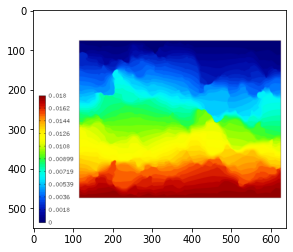

block type=  <class 'numpy.ndarray'>
block shape=  (550, 640, 3)
block type=  float32


In [9]:
'''Code'''
'''Code'''
import numpy as np


from matplotlib import image
from matplotlib import pyplot as plt

block = plt.imread( 'images/temperature.png', format='png' )   #import and read temperature image 

plt.imshow(block)
plt.show()

print("block type= ", type(block))
print("block shape= ", block.shape)
print("block type= ", block.dtype)



### <span style="color:blue">[3.2)](#toa) Crop the image keeping the temperature field with minimum data loss and show it as follows.</span><a id="a32"></a>

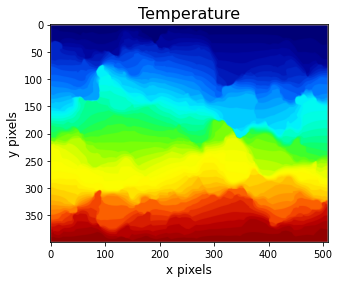

In [10]:

plt.imshow(block)
sub_block = block[75:474,115:625,:]   #cropping image in the x and y axis 

plt.imshow(sub_block)

plt.title('Temperature',fontsize=16)
plt.xlabel('x pixels',fontsize=12)
plt.ylabel('y pixels',fontsize=12)
plt.show()

### <span style="color:blue">[3.3)](#toa) Plot the vertical centerline temperature profile as follows. Scale the red channel by 385 C, the green channel by 180 C, and the blue channel by 75 C. Add the contribution of each channel to compute the resulting temperature. Calculate the mean temperature and indicate on the same plot.</span><a id="a33"></a>

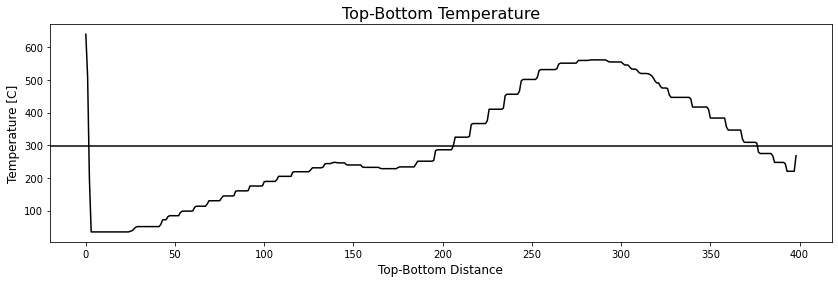

mean = 298.23282


In [15]:
'''Code'''
vert_temp = int(sub_block.shape[0]/2)

temp_r = sub_block[:,vert_temp, 0]*385   #reading temp of red and scaling by 385C
temp_g = sub_block[:,vert_temp,1]*180    #reading temp of green and scaling by 180C
temp_b = sub_block[:,vert_temp,2]*75    #reading temp of blue and scaling by 75C
temp= temp_r + temp_g + temp_b




n_pixels = temp.size
plt.figure(6)
plt.plot(range(n_pixels),temp,'k')
plt.title('Top-Bottom Temperature',fontsize=16)
plt.xlabel('Top-Bottom Distance',fontsize=12)
plt.ylabel('Temperature [C]',fontsize=12)
plt.xlim=500
plt.ylim=450
plt.axhline(y=temp.mean(),color = 'k')
plt.show()

print('mean =', temp.mean())

### <span style="color:blue">[3.4)](#toa) Using the same scaling as in 3.3), find the temperatures above the mean temperature for the entire domain and show it as below. Compute and display the mean temperature on the title of the plot.</span><a id="a34"></a>

In [16]:
'''Code'''

masked = block


plt.imshow(high_temp)
plt.title('Temperatures above the Mean (298.2)',fontsize=16)
plt.xlabel('y pixels',fontsize=12)
plt.ylabel('x pixels',fontsize=12)
plt.show

NameError: name 'high_temp' is not defined

## <span style="color:blue">[Assignment 4 (25 pts)](#toa)</span><a id="a4"></a>

### <span style="color:blue">[4.1)](#toa) Create the following centered superposition of the images used above.</span><a id="a41"></a>

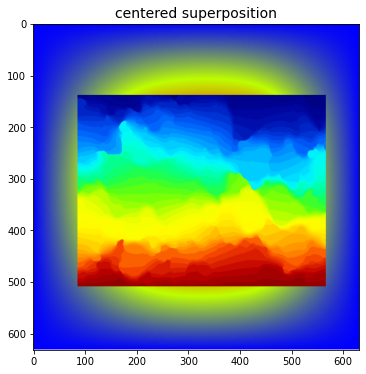

In [31]:
'''Code'''
import numpy as np

block1 = plt.imread('images/dissolve.png', format = 'png')
block2 = plt.imread('images/temperature.png', format='png')

sub_block = block2[100:470,120:600,:]     #cropping temp image 
plt.rcParams["figure.figsize"] = [20,6]     

new_block = np.copy(block1)                 
new_block[139:509,86:566,:] = sub_block         
plt.figure()

plt.imshow(new_block)

plt.title("centered superposition", fontsize = 14)

plt.show()

### <span style="color:blue">[4.2)](#toa) Create the following horizontal concatenation of the same images with a centered right side image.</span></span><a id="a42"></a>

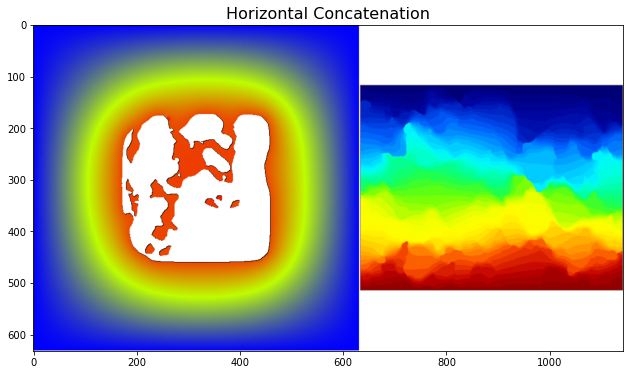

In [34]:
'''Code'''

from matplotlib import pyplot as plt
import numpy as np



block1 = plt.imread('images/dissolve.png', format = 'png')
block2 = plt.imread('images/temperature.png', format='png')
crop = block2[75:474,115:625,:]                 #crop image 

block1_height=block1.shape[0]     #set the height 
block1_width=block1.shape[1]       #set the width 

crop_height=crop.shape[0]
crop_width=crop.shape[1]

crop_ext = np.ones((block1_height,crop_width,3))   #set to ones for white     
row=int((block1_height - crop_height)/2)            
crop_ext[row:row+crop_height,:,:]=crop              #setting where the white is placed


horz = np.ones ((block1_height, block1_width+crop_width,3))

horz[:block1_height,:block1_width,:] = block1
horz[:block1_height,block1_width:,:] = crop_ext

plt.imshow(horz)

plt.title("Horizontal Concatenation", fontsize = 16)
plt.show()


## <span style="color:blue">[Assignment 5 (5 pts)](#toa)</span><a id="a5"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

+ I am confused by the difference of figure size and pixel count and coarseness. I understand coarseness reduces the number of pixels per the figure size. What I do not understand is does increasing the figure size reduce increase th coarseness as well. Or does it automatically increase the amount of pixels to compansate for the larger figure size.  

I could not finish 3.4 I tried many different ways and I kept getting different errors and it was too late to ask for help by time I realized how difficult 3.4 would be.